### [Eilon Dadon 315784611](#eilon-dadon-315784611)
### [Shay Davidovich 209208057](#shay-davidovich-209208057)

# <span style="font-size: 1.2em;">Table of Contents</span>

- <span style="font-size: 1.1em;">[1. Learning The Data](#1-learning-the-data)</span>
- <span style="font-size: 1.1em;">[2. Preparing The Data](#2-preparing-the-data)</span>
  - <span style="font-size: 1.05em;">[2.1 Creating Cleaning and Outlier Removal Functions](#21-creating-cleaning-and-outlier-removal-functions)</span>
- <span style="font-size: 1.1em;">[3. Analyzing Donations Through Years](#3-analyzing-donations-through-years)</span>
  - <span style="font-size: 1.05em;">[3.1 Examining Donation Size and Quantity Distribution](#31-examining-donation-size-and-quantity-distribution)</span>
- <span style="font-size: 1.1em;">[4. Building Classification Models](#4-building-classification-models)</span>
  - <span style="font-size: 1.05em;">[4.1 Preparing Data: Encoding Features and Pipelines](#41-preparing-data-encoding-features-and-pipelines)</span>
  - <span style="font-size: 1.05em;">[4.2 Evaluating Models](#42-evaluating-models)</span>
    - <span style="font-size: 1em;">[4.2.1 Logistic Regression](#421-logistic-regression)</span>
    - <span style="font-size: 1em;">[4.2.2 Random Forest](#422-random-forest)</span>
    - <span style="font-size: 1em;">[4.2.3 XGBoost](#423-xgboost)</span>
    - <span style="font-size: 1em;">[4.2.4 SVM](#424-svm)</span>
    - <span style="font-size: 1em;">[4.2.5 KNN](#425-knn)</span>
  - <span style="font-size: 1.05em;">[4.3 Final Model Training and Feature Importance](#43-final-model-training-and-feature-importance)</span>
    - <span style="font-size: 1em;">[4.3.1 Building the Final Model](#431-building-the-final-model)</span>
    - <span style="font-size: 1em;">[4.3.2 Feature Importance Analysis](#432-feature-importance-analysis)</span>
- <span style="font-size: 1.1em;">[5. Cluster Analysis](#5-cluster-analysis)</span>
  - <span style="font-size: 1.05em;">[5.1 K-Means Clustering](#51-k-means-clustering)</span>
    - <span style="font-size: 1em;">[5.1.1 Optimal Clusters with Elbow Method](#511-optimal-clusters-with-elbow-method)</span>
    - <span style="font-size: 1em;">[5.1.2 Finalizing K-Means](#512-finalizing-k-means)</span>
    - <span style="font-size: 1em;">[5.1.3 Visualizing K-Means Results](#513-visualizing-k-means-results)</span>
  - <span style="font-size: 1.05em;">[5.2 DBSCAN Clustering](#52-dbscan-clustering)</span>
    - <span style="font-size: 1em;">[5.2.1 Visualizing DBSCAN Clusters](#521-visualizing-dbscan-clusters)</span>


In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
warnings.filterwarnings("ignore", category=UserWarning)  
warnings.filterwarnings("ignore", category=FitFailedWarning)  

In [2]:
# API URL and parameters
url = 'https://data.gov.il/api/3/action/datastore_search'
params = {'resource_id': '35cb40b5-3f13-4bca-9ce2-488085913107'}

# Fetch data from API and load into DataFrame
response = requests.get(url, params=params)
data = pd.DataFrame(response.json()['result']['records'])
data = data.copy()

# 1. Learning The Data

In [3]:
data.head()

,_id,מספר עמותה,שם עמותה,תאריך קבלת התרומה,ישות מדינית זרה תורמת,סוג ישות מדינית זרה תורמת (קוד),סכום התרומה בש~ח,מטבע,שער המרה,מטרת תרומה,התנאים לתרומה,שנת תרומה,רבעון תרומה,עיקר מימון תרומות מישות מדינית זרה
0,1,580000370,עוז ושלום~ החוג הרעיוני לציונות דתית (ע~ר),29/06/2021,Stichingqnet solidariteits fand,איחוד~ ארגון או חבר של גופים זרים,47416,אירו,3.95,עלון שבת שלום,,2020,ראשון,לא
1,2,580000370,עוז ושלום~ החוג הרעיוני לציונות דתית (ע~ר),29/06/2021,Penn Commissie Dienst,איחוד~ ארגון או חבר של גופים זרים,3296,אירו,3.88,עלון שבת שלום,,2020,ראשון,לא
2,3,580002053,סינמטק תל - אביב (ע~ר),01/07/2019,שגרירות אוסטריה,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,4350,אירו,4.23,תמיכה בפסטיבל הסטודנטים,ללא,2018,רביעי,לא
3,4,580002053,סינמטק תל - אביב (ע~ר),01/07/2019,שגרירות יוון,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,1577,אירו,4.15,כרטיסי טיסה לאמנים משתתפים בפסטיבל הסטודנטים,ללא,2018,רביעי,לא
4,5,580002053,סינמטק תל - אביב (ע~ר),01/07/2019,שגרירות הונגריה,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,7600,אירו,4.20,כרטיסי טיסה אורחים מהונגריה לפסטיבל הסטונדטים,ללא,2018,רביעי,לא


In [4]:
data.describe()

,_id,מספר עמותה,סכום התרומה בש~ח,שער המרה,שנת תרומה
count,12032.000000,1.203200e+04,1.203200e+04,1.203200e+04,12032.000000
mean,6016.500000,5.689722e+08,7.545567e+05,3.865742e+02,2018.392869
std,3473.483554,2.483433e+07,2.341901e+07,3.590251e+04,3.311997
min,1.000000,5.100307e+08,-4.730000e+04,0.000000e+00,2012.000000
25%,3008.750000,5.800593e+08,2.945150e+04,0.000000e+00,2016.000000
50%,6016.500000,5.802750e+08,7.489000e+04,3.490000e+00,2018.000000
75%,9024.250000,5.804107e+08,1.728000e+05,3.890000e+00,2021.000000
max,12032.000000,5.807811e+08,2.465184e+09,3.922325e+06,2024.000000


In [5]:
data.columns

Index(['_id', 'מספר עמותה', 'שם עמותה', 'תאריך קבלת התרומה',
       'ישות מדינית זרה תורמת', 'סוג ישות מדינית זרה תורמת (קוד)',
       'סכום התרומה בש~ח', 'מטבע', 'שער המרה', 'מטרת תרומה', 'התנאים לתרומה',
       'שנת תרומה', 'רבעון תרומה', 'עיקר מימון תרומות מישות מדינית זרה'],
      dtype='object')

In [6]:
data.isnull().sum()

_id                                   0
מספר עמותה                            0
שם עמותה                              0
תאריך קבלת התרומה                     0
ישות מדינית זרה תורמת                 0
סוג ישות מדינית זרה תורמת (קוד)       0
סכום התרומה בש~ח                      0
מטבע                                  0
שער המרה                              0
מטרת תרומה                            0
התנאים לתרומה                         0
שנת תרומה                             0
רבעון תרומה                           0
עיקר מימון תרומות מישות מדינית זרה    0
dtype: int64

# 2. Preparing The Data

In [7]:
# Changing Hebrew column header to English
data.columns = data.columns.str.strip()
column_mapping = {
"_id": "ID",
"מספר עמותה": "Association Number",
"שם עמותה": "Association Name",
"תאריך קבלת התרומה": "Donation Receipt Date",
"ישות מדינית זרה תורמת": "Foreign Entity Name",
"סוג ישות מדינית זרה תורמת (קוד)": "Type of Foreign Entity",
"סכום התרומה בש~ח": "Donation Amount",
"מטבע": "Currency",
"שער המרה": "Exchange Rate",
"מטרת תרומה": "Donation Purpose",
"התנאים לתרומה": "Donation Conditions",
"שנת תרומה": "Donation Year",
"רבעון תרומה": "Donation Quarter",
"עיקר מימון תרומות מישות מדינית זרה": "Main Funding from Foreign Entity"
}
# Rename columns
data.rename(columns=column_mapping, inplace=True)

In [8]:
data.columns

Index(['ID', 'Association Number', 'Association Name', 'Donation Receipt Date',
       'Foreign Entity Name', 'Type of Foreign Entity', 'Donation Amount',
       'Currency', 'Exchange Rate', 'Donation Purpose', 'Donation Conditions',
       'Donation Year', 'Donation Quarter',
       'Main Funding from Foreign Entity'],
      dtype='object')

### Creating 2 functions: 1. cleaning data 2. removing outliers

In [9]:
def prepare_data(data):
    # Strip leading/trailing whitespaces from all elements in the DataFrame
    data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x) #this line from ##GPT##

    # Convert relevant columns to uppercase
    data['Donation Conditions'] = data['Donation Conditions'].str.upper()
    data['Foreign Entity Name'] = data['Foreign Entity Name'].str.upper()

    # Group multiple values into one group
    # "Foreign Entity Name" Column
    data.loc[data['Foreign Entity Name'].str.contains('MEPI', case=False), 'Foreign Entity Name'] = 'MEPI'
    data.loc[data['Foreign Entity Name'].str.contains('USAID|שגרירות ארה|שגרירות ארצות|שגרירות אר~הב|UNITED STATES AGENCY FOR INTERNATIONAL DEVELOPMENT', case=False), 'Foreign Entity Name'] = 'USAID'
    data.loc[data['Foreign Entity Name'].str.contains('האיחוד האי', case=False), 'Foreign Entity Name'] = 'האיחוד האירופי'
    data.loc[data['Foreign Entity Name'].str.contains('רוזה', case=False), 'Foreign Entity Name'] = 'קרן רוזה לוקסמבורג'
    data.loc[data['Foreign Entity Name'].str.contains('BREAD', case=False), 'Foreign Entity Name'] = 'BREAD FOR THE WORLD'
    data.loc[data['Foreign Entity Name'].str.contains('NORWEGIAN REF', case=False), 'Foreign Entity Name'] = 'NORWEGIAN REFUGEE COUNCIL'
    data.loc[data['Foreign Entity Name'].str.contains('UNDP', case=False), 'Foreign Entity Name'] = 'UNDP'
    data.loc[data['Foreign Entity Name'].str.contains('BROEDE', case=False), 'Foreign Entity Name'] = 'BROEDERLIJK DELEN'
    data.loc[data['Foreign Entity Name'].str.contains('MISEREOR', case=False), 'Foreign Entity Name'] = 'MISEREOR'
    data.loc[data['Foreign Entity Name'].str.contains('UNHCR', case=False), 'Foreign Entity Name'] = 'UNHCR'
    data.loc[data['Foreign Entity Name'].str.contains('היינריך', case=False), 'Foreign Entity Name'] = 'קרן היינריך בל'
    data.loc[data['Foreign Entity Name'].str.contains('אברט', case=False), 'Foreign Entity Name'] = 'קרן פרידריך אברט'
    data.loc[data['Foreign Entity Name'].str.contains('שגרירות גרמניה', case=False), 'Foreign Entity Name'] = 'שגרירות גרמניה'
    data.loc[data['Foreign Entity Name'].str.contains('OXFAM NOV', case=False), 'Foreign Entity Name'] = 'OXFAM NOVIB'
    data.loc[data['Foreign Entity Name'].str.contains('DIAKO', case=False), 'Foreign Entity Name'] = 'DIAKONIA'
    data.loc[
        ((data['Foreign Entity Name'].str.contains('אין') & (data['Foreign Entity Name'].str.len() == 3)) | 
         (data['Foreign Entity Name'].str.contains('אין תרומה'))), 
        'Foreign Entity Name'
    ] = 'אין תרומה'

    # "Donation Purpose" Column
    data.loc[data['Donation Purpose'].str.contains('פעילות שוטפת', case=False), 'Donation Purpose'] = 'פעילות שוטפת'
    data.loc[data['Donation Purpose'].str.contains('קידום מקצועי', case=False), 'Donation Purpose'] = 'קידום מקצועי לרשויות'
    data.loc[data['Donation Purpose'].str.contains('מחקר', case=False), 'Donation Purpose'] = 'מחקר'

    # "Donation Conditions" Column
    data.loc[(data['Donation Conditions'].str.contains('אין|ללא תנאים'))|(data['Donation Conditions'] == ''), 'Donation Conditions'] = "אין תנאי"
    data.loc[data['Donation Conditions'].str.contains('דוח|דו~ח'),'Donation Conditions'] = 'הגשת דוח מעקב'

    # Convert quarters from text to numbers
    data.loc[data['Donation Quarter'].str.contains('ראשון', case=False, na=False), 'Donation Quarter'] = 1
    data.loc[data['Donation Quarter'].str.contains('שני', case=False, na=False), 'Donation Quarter'] = 2
    data.loc[data['Donation Quarter'].str.contains('שלישי', case=False, na=False), 'Donation Quarter'] = 3
    data.loc[data['Donation Quarter'].str.contains('רביעי', case=False, na=False), 'Donation Quarter'] = 4

    # Correcting negative donation amounts in Donation Amount column
    data.loc[data['Donation Amount'] < 0, 'Donation Amount'] = data.loc[data['Donation Amount'] < 0, 'Donation Amount'] * -1

    # Remove specific erroneous record by ID
    index_to_drop = data[data['ID'] == 9718].index
    data = data.drop(index_to_drop)

    return data

In [10]:
data = prepare_data(data)

C:\Users\User\AppData\Local\Temp\ipykernel_34596\736995564.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x) #this line from ##GPT##


### בדיקת איזה ערכי שוליים להסיר
* הסבר על ניקוי ערכים שוליים:
* היות ואנחנו רוצים לחזות את מטרת התרומה וראינו שיש המון סוגים של מטרות תרומה עם ערך אחד שהופיע.
* מצד שני רוב הנתונים שלנו עם מטרות תרומה שמופיעות המון פעמים.
* בטבלה שנראה מיד עכשיו (למטה) נוכל לראות שעשינו איגוד לכל סוג של מטרת תרומה וכאשר נשאיר רק את הנתונים שמטרת התרומה שלנם הופיעה יותר מ3 פעמים עדיין נשאר לנו יותר מ6700 שורות.

In [11]:
##GPT CODE##
# Group by 'Association Name' and calculate mean of 'Donation Amount' and count of 'ID'
donation_purpose_count = data.groupby('Donation Purpose')[['ID']].count()

# Rename the 'ID' column to 'Donations Count'
donation_purpose_count.rename(columns={'ID': 'Purpose Count'}, inplace=True)

# Sort by the 'Donations Count' column
donation_purpose_count.sort_values('Purpose Count', ascending=False, inplace=True)

# Reset the index
donation_purpose_count.reset_index(inplace=True)

# Get the names of donation purposes with more than 4 donations
donation_purposes_more_than_4 = donation_purpose_count[donation_purpose_count['Purpose Count'] > 4]['Donation Purpose']

# Filter the original data to include only these donation purposes
filtered_data = data[data['Donation Purpose'].isin(donation_purposes_more_than_4)]

# Print the filtered data count
print(f"Number of rows in the original data for donation purposes with more than 4 donations: {filtered_data.shape[0]}")
print(f"Number of rows in the original data for donation purposes with 1 donation:{len(donation_purpose_count[donation_purpose_count['Purpose Count'] == 1])}")
# Display the dataframe
donation_purpose_count

Number of rows in the original data for donation purposes with more than 4 donations: 6774
Number of rows in the original data for donation purposes with 1 donation:2699


,Donation Purpose,Purpose Count
0,מחקר,580
1,פעילות שוטפת,340
2,תמיכה כללית,332
3,קידום מטרות העמותה,328
4,קידום מקצועי לרשויות,169
...,...,...
4062,מיקדה למימון פרוייקט מדיה,1
4063,מכשיר ביוכימיה לספירת דם עבור טרם קרית גת,1
4064,מלגה למימון סדנאת חשיבה על פתרונות לעתיד עבור ...,1
4065,מלגות והכשרות,1


In [12]:
def clear_outliers(data):
    # Sacing data purpose that count more 4 times
    purposes_with_at_least_four = data['Donation Purpose'].value_counts()
    purposes_with_at_least_four = purposes_with_at_least_four[purposes_with_at_least_four > 4].index
    
    # filtering our df
    data = data[data['Donation Purpose'].isin(purposes_with_at_least_four)]
    return data

In [13]:
# Using our funcs on our data that we will use to build our models
model_data = prepare_data(data)
model_data = clear_outliers(model_data)

C:\Users\User\AppData\Local\Temp\ipykernel_34596\736995564.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x) #this line from ##GPT##


In [14]:
model_data.shape

(6774, 14)

## 3. Analyzing Donations Through Years

### We will examine the distribution of donation size and donation quantity over the years, in order to better understand the data.

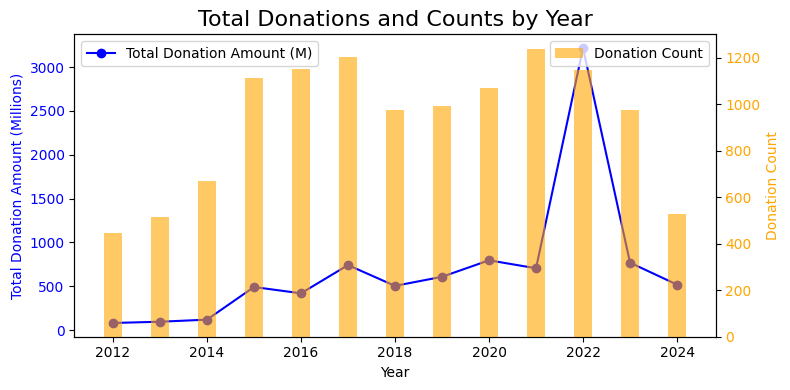

In [15]:
# Grouping the data by year and calculating total donations and counts
donations_summary = data.groupby('Donation Year').agg(Total_Donation_Amount=('Donation Amount', 'sum'),Donation_Count=('Donation Amount', 'count')).reset_index()
donations_summary['Total_Donation_Amount'] /= 1_000_000  # Convert to millions

# Creating the figure
fig, ax1 = plt.subplots(figsize=(8, 4))

# Line plot for donation amounts (in millions)
ax1.plot(donations_summary['Donation Year'], donations_summary['Total_Donation_Amount'], marker='o', color='b', label='Total Donation Amount (M)')
ax1.set_ylabel("Total Donation Amount (Millions)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Bar plot for donation counts
ax2 = ax1.twinx()
ax2.bar(donations_summary['Donation Year'], donations_summary['Donation_Count'], alpha=0.6, color='orange', label='Donation Count', width=0.4)
ax2.set_ylabel("Donation Count", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titles and layout
plt.title("Total Donations and Counts by Year", fontsize=16)
ax1.set_xlabel("Year")
plt.grid(axis='x', linestyle='--', alpha=0.7)
fig.tight_layout()

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# 4. Building Calssification Models

## 4.1 Creating X and y to our model , encoding our featuers and creating pipeline 

In [16]:
#Selecting columns to our model
# Categorial Columns
categorical_features = [
    'Association Name',           
    'Foreign Entity Name',        
    'Currency',                   
    'Donation Year',
    'Donation Quarter',
    'Type of Foreign Entity'
]

# Numerical Columns
numerical_features = [
    'Donation Amount'
]

In [17]:
# encoding target column
label_encoder = LabelEncoder()
model_data['Donation Purpose Encoded'] = label_encoder.fit_transform(model_data['Donation Purpose'])

# creating X and y to our model
X = model_data[categorical_features + numerical_features]
y = model_data['Donation Purpose Encoded']

In [18]:
# Creating our pipeline
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
data_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_preprocessed = data_pipeline.fit_transform(X)

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)
# Stratify הפרמטר
#נועד לשימוש בעת חלוקת הנתונים לסטי אימון ובדיקה, והוא מבטיח שהיחסים בין הקבוצות במשתנה היעד יישמרו בצורה דומה גם בסט האימון וגם בסט הבדיקה. 
#הדבר חשוב במיוחד במקרים של נתונים לא מאוזנים, כאשר חלק מהקבוצות מיוצגות פחות מאחרות.
#בלעדיו המודלים שלנו לא פעלו

## 4.2 Running Our Models to Select the Best One

Each model will be evaluated on the following metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

Additionally, all models will undergo **5-Fold Cross-Validation** to ensure robust performance.


### 4.2.1 Logistic Regression

In [20]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

# עיגול התחזיות לערכים שלמים (מתאים לרב-קטגוריאלי)
y_pred_rounded = np.round(y_pred_lr).astype(int)

# חישוב המדדים עבור סיווג רב-קטגוריאלי
accuracy_lr = accuracy_score(y_test, y_pred_rounded)
precision_lr = precision_score(y_test, y_pred_rounded, average='macro', zero_division=0)
recall_lr = recall_score(y_test, y_pred_rounded, average='macro', zero_division=0)
f1_lr = f1_score(y_test, y_pred_rounded, average='macro', zero_division=0)

# הצגת התוצאות
print(f"Logistic Regression: Test Accuracy = {accuracy_lr:.4f}")
print(f"Logistic Regression: Test Precision (Macro) = {precision_lr:.4f}")
print(f"Logistic Regression: Test Recall (Macro) = {recall_lr:.4f}")
print(f"Logistic Regression: Test F1-Score (Macro) = {f1_lr:.4f}")

# Perform 5-Fold Cross Validation
cv_scores_lr = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score_lr = np.mean(cv_scores_lr)
print(f"Linear Regression: 5-Fold Cross-Validation Mean R^2 = {mean_cv_score_lr:.4f}")

Logistic Regression: Test Accuracy = 0.7978
Logistic Regression: Test Precision (Macro) = 0.7160
Logistic Regression: Test Recall (Macro) = 0.7009
Logistic Regression: Test F1-Score (Macro) = 0.6943
Linear Regression: 5-Fold Cross-Validation Mean R^2 = 0.7750


### 4.2.2 Random Forest

In [21]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# חישוב המדדים
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)

# הצגת תוצאות המדדים
print(f"Random Forest: Test Accuracy = {accuracy_rf:.4f}")
print(f"Random Forest: Test Precision (Macro) = {precision_rf:.4f}")
print(f"Random Forest: Test Recall (Macro) = {recall_rf:.4f}")
print(f"Random Forest: Test F1-Score (Macro) = {f1_rf:.4f}")

# Perform 5-Fold Cross Validation
cv_scores_rf = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
mean_accuracy_rf = np.mean(cv_scores_rf)

print(f"Random Forest: 5-Fold Cross-Validation Mean Accuracy = {mean_accuracy_rf:.4f}")

Random Forest: Test Accuracy = 0.8125
Random Forest: Test Precision (Macro) = 0.7416
Random Forest: Test Recall (Macro) = 0.7526
Random Forest: Test F1-Score (Macro) = 0.7309
Random Forest: 5-Fold Cross-Validation Mean Accuracy = 0.7989


### 4.2.3 XGBoost

In [22]:
# XGBoost
xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

# חישוב המדדים
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro', zero_division=0)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro', zero_division=0)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro', zero_division=0)

# הצגת התוצאות
print(f"XGBoost: Test Accuracy = {accuracy_xgb:.4f}")
print(f"XGBoost: Test Precision (Macro) = {precision_xgb:.4f}")
print(f"XGBoost: Test Recall (Macro) = {recall_xgb:.4f}")
print(f"XGBoost: Test F1-Score (Macro) = {f1_xgb:.4f}")

# Perform 5-Fold Cross Validation
cv_scores_xgb = cross_val_score(xgboost_model, X_train, y_train, cv=5, scoring='accuracy')
mean_accuracy_xgb = np.mean(cv_scores_xgb)
print(f"XGBoost: 5-Fold Cross-Validation Mean Accuracy = {mean_accuracy_xgb:.4f}")

XGBoost: Test Accuracy = 0.7875
XGBoost: Test Precision (Macro) = 0.7402
XGBoost: Test Recall (Macro) = 0.7318
XGBoost: Test F1-Score (Macro) = 0.7206
XGBoost: 5-Fold Cross-Validation Mean Accuracy = 0.7568


### 4.2.4 SVM

In [23]:
# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# חישוב המדדים
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro', zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, average='macro', zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, average='macro', zero_division=0)

# הצגת התוצאות
print(f"SVM: Test Accuracy = {accuracy_svm:.4f}")
print(f"SVM: Test Precision (Macro) = {precision_svm:.4f}")
print(f"SVM: Test Recall (Macro) = {recall_svm:.4f}")
print(f"SVM: Test F1-Score (Macro) = {f1_svm:.4f}")

# Perform 5-Fold Cross Validation
cv_scores_svm = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
mean_accuracy_svm = np.mean(cv_scores_svm)
print(f"SVM: 5-Fold Cross-Validation Mean Accuracy = {mean_accuracy_svm:.4f}")

SVM: Test Accuracy = 0.7432
SVM: Test Precision (Macro) = 0.5760
SVM: Test Recall (Macro) = 0.5581
SVM: Test F1-Score (Macro) = 0.5516
SVM: 5-Fold Cross-Validation Mean Accuracy = 0.6885


### 4.2.5 KNN

In [24]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# חישוב המדדים
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='macro', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='macro', zero_division=0)

# הצגת התוצאות
print(f"KNN: Test Accuracy = {accuracy_knn:.4f}")
print(f"KNN: Test Precision (Macro) = {precision_knn:.4f}")
print(f"KNN: Test Recall (Macro) = {recall_knn:.4f}")
print(f"KNN: Test F1-Score (Macro) = {f1_knn:.4f}")

# Perform 5-Fold Cross Validation
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
mean_accuracy_knn = np.mean(cv_scores_knn)
print(f"KNN: 5-Fold Cross-Validation Mean Accuracy = {mean_accuracy_knn:.4f}")

KNN: Test Accuracy = 0.6982
KNN: Test Precision (Macro) = 0.5785
KNN: Test Recall (Macro) = 0.6243
KNN: Test F1-Score (Macro) = 0.5790
KNN: 5-Fold Cross-Validation Mean Accuracy = 0.6691


<h2>Our best model is <span style="color: green;">Random Forest</span> with <span style="color: green;">80% accuracy score</span>. (score after 5 fold cv)</h2>

## 4.3 Training our chosen model on the whole dataset and checking our feature importance

### 4.3.1 Creating our full random forest model

In [25]:
# Creating Random Forest model
random_forest_full = RandomForestClassifier(random_state=42)
X = X_train 
y = y_train 
random_forest_full.fit(X, y)

RandomForestClassifier(random_state=42)

### 4.3.2 Feature Importance

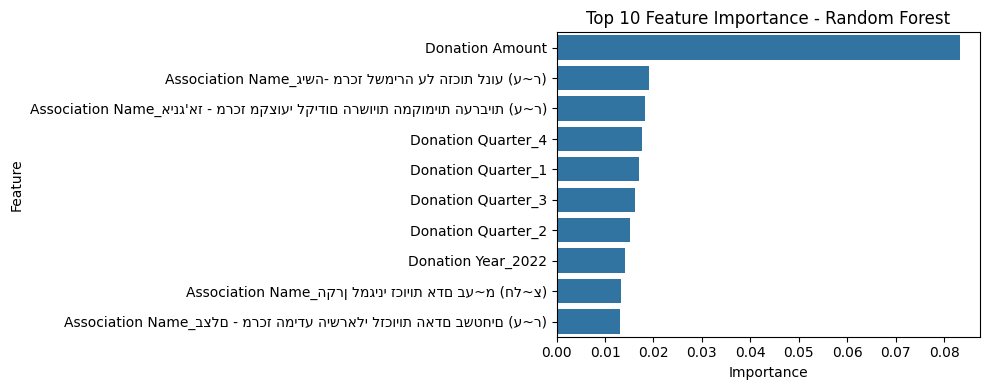

In [26]:
# getting encoder feature names
feature_names_num = numerical_features
feature_names_cat = data_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out() ##GPT Line###
feature_names = list(feature_names_num) + list(feature_names_cat)

# calcualting our feature importance
importances = random_forest.feature_importances_

# creating df with the feature importance 
importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances})

# sorting our feature 
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#selecting only our top 10 features 
top_10_features = importance_df.head(10)

#creating a plot
##GPT##
plt.figure(figsize=(10,4))
sns.barplot(x=top_10_features['Importance'], y=top_10_features['Feature'])
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 5. Cluster Analysis

## Models Used:
1. **K-Means**
2. **DBSCAN**


In [27]:
#using our functions on our unsupervised data
unsupervised_data = prepare_data(data)
unsupervised_data = clear_outliers(unsupervised_data)

C:\Users\User\AppData\Local\Temp\ipykernel_34596\736995564.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x) #this line from ##GPT##


In [28]:
unsupervised_data.shape

(6774, 14)

In [29]:
unsupervised_data.isnull().sum()

ID                                  0
Association Number                  0
Association Name                    0
Donation Receipt Date               0
Foreign Entity Name                 0
Type of Foreign Entity              0
Donation Amount                     0
Currency                            0
Exchange Rate                       0
Donation Purpose                    0
Donation Conditions                 0
Donation Year                       0
Donation Quarter                    0
Main Funding from Foreign Entity    0
dtype: int64

In [30]:
#choosing our 2 main features that we will use in our cluster
features = ['Donation Amount', 'Donation Year']
clustering_data = unsupervised_data[features]

# scaling our clustering data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

## 5.1 K-Means

## 5.1.1 Finding Optimal K

### Elbow Method

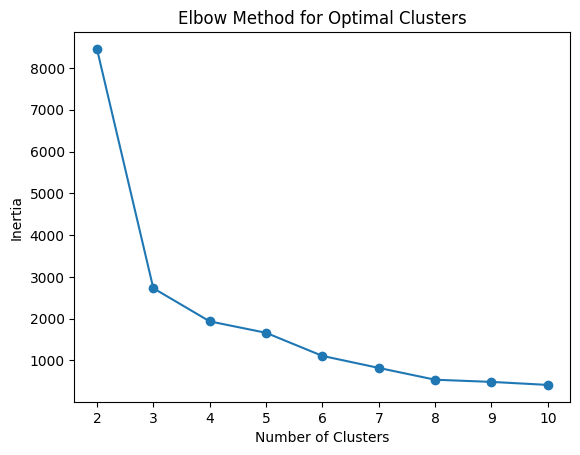

In [31]:
# building our clusters range
inertia = []
range_clusters = range(2, 11)

#running our score for each k
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# viewing our result in lineplot
##GPT##
plt.figure()
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## We can see that our optimal clusters will be **3** ##
* we will verify it also with silhouette score

### Silhouette Score

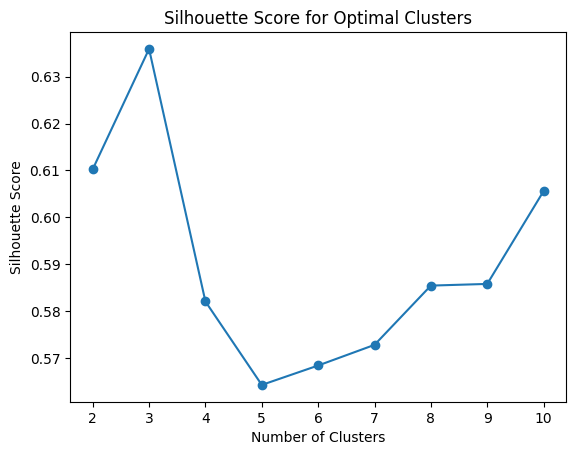

In [32]:
# building our model again
silhouette_scores = []
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

# viewing our result in lineplot
plt.figure()
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### After we saw elbow method and silhouette score we will choose k = 3

## 5.1.2 Setting Our final K-Means

In [33]:
# k =3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
unsupervised_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [34]:
#veryfing the our clusters divided in a logical manner and not clustered with individual results
total_clusters = max(unsupervised_data['Cluster'])+1
for i in range(0,total_clusters):
    if i > total_clusters:
        break
    else:
        print(len(unsupervised_data[unsupervised_data['Cluster'] == i]))
        i += 1
print(f"We have:{total_clusters} clusters")

3195
3550
29
We have:3 clusters


## 5.1.3 Visualzing the K-Means clusters

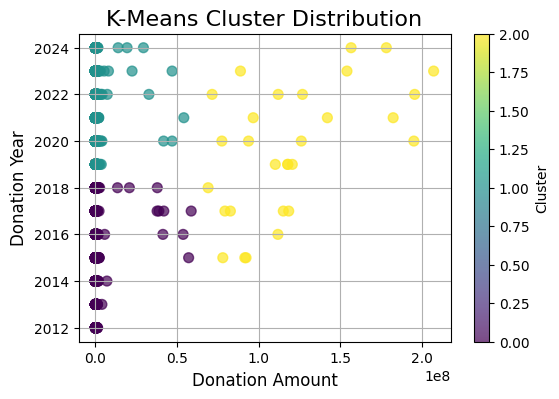

In [41]:
#scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(
    clustering_data['Donation Amount'], clustering_data['Donation Year'], 
    c=unsupervised_data['Cluster'], cmap='viridis', s=50, alpha=0.7
)
# plot titles
plt.title('K-Means Cluster Distribution', fontsize=16)
plt.xlabel('Donation Amount', fontsize=12)
plt.ylabel('Donation Year', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### K-MEANS Results: 3 Clusters and our sillhoutte score is 64%

# 5.2 DBSCAN

In [36]:
# selecting cluster features
features = ['Donation Amount', 'Donation Year']
clustering_data = unsupervised_data[features]

# scaling our features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# creating our dbscan model
dbscan = DBSCAN(eps=0.3, min_samples=100)
unsupervised_data['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_data)

In [37]:
#filtering our our noisy data with excluding the "-1"
cluster_labels = unsupervised_data['Cluster_DBSCAN']
unique_labels = cluster_labels[cluster_labels != -1].nunique()

#checking that we have more then 1 cluster
##GPT##
if unique_labels > 1:
    # silhoutte score for the DBSCAN
    silhouette_dbscan = silhouette_score(
        scaled_data[unsupervised_data['Cluster_DBSCAN'] != -1],
        cluster_labels[cluster_labels != -1]
    )
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
else:
    print("DBSCAN did not produce enough valid clusters. Adjust 'eps' or 'min_samples'.")

Silhouette Score for DBSCAN: 0.930599807601205


In [38]:
#Veryfing the our clusters divided in a logical manner and not clustered with individual results
total_clusters = max(unsupervised_data['Cluster_DBSCAN'])+1
for i in range(0,total_clusters):
    if i > total_clusters:
        break
    else:
        print(len(unsupervised_data[unsupervised_data['Cluster_DBSCAN'] == i]))
        i += 1
print(f"We have:{total_clusters} clusters")

615
637
637
699
571
568
610
514
752
249
338
349
181
We have:13 clusters


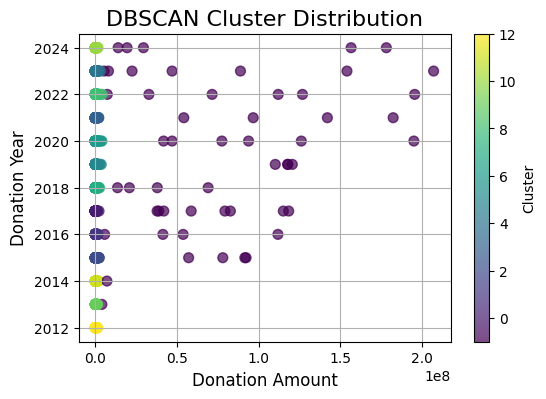

In [39]:
#visulizing our results 
plt.figure(figsize=(6,4))

# scatter plot
plt.scatter(
    clustering_data['Donation Amount'], clustering_data['Donation Year'], 
    c=unsupervised_data['Cluster_DBSCAN'], cmap='viridis', s=50, alpha=0.7
)

# plot titles
plt.title('DBSCAN Cluster Distribution', fontsize=16)
plt.xlabel('Donation Amount', fontsize=12)
plt.ylabel('Donation Year', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### DBSCAN Results: 13 Clusters and our sillhoutte score is 92%